## Hotspot trends over time on Census Tract

In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")

In [8]:
df = df.reset_index()

In [9]:
trends_df = (
    df.groupby("GEOID")[
        [
            "time",
            "ws",
            "hw",
            "hs",
            "hws",
            "wfday",
            "hs5",
            "hws5",
            "ws5",
            "heatday",
            "smoke_pm_non_zero",
            "smoke_pm_gt_five",
        ]
    ]
    .resample("Y", on="time")
    .sum()
)

In [10]:
trends_df.head()

ws  hw  hs  hws  wfday  hs5  hws5  ws5  heatday  \
GEOID       time                                                          
04001942600 2006-12-31   0   0   5    0      0    1     0    0       24   
            2007-12-31   0   0   4    0      0    1     0    0       27   
            2008-12-31   0   0   3    0      1    0     0    0       13   
            2009-12-31   0   0   2    0      0    0     0    0       16   
            2010-12-31   0   0   1    0      0    0     0    0       12   

                        smoke_pm_non_zero  smoke_pm_gt_five  
GEOID       time                                             
04001942600 2006-12-31                 29                 2  
            2007-12-31                 19                 2  
            2008-12-31                 24                 0  
            2009-12-31                 22                 3  
            2010-12-31                 18                 0

In [ ]:
%load_ext lab_black

In [11]:
import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

In [12]:
trends_df = trends_df.reset_index()

KeyError: 'Column not found: coldday'

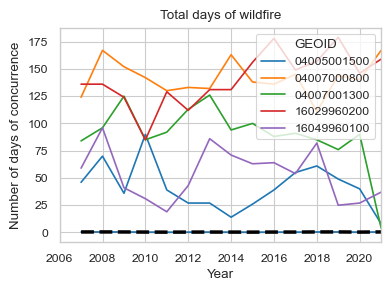

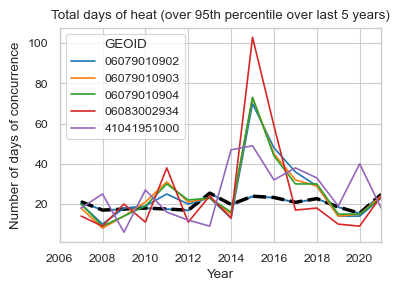

In [13]:
for x in hs_dict.keys():
    l = trends_df.groupby("GEOID")[x].sum().sort_values().tail(5).index

    plotting.trend_plot(trends_df, l, x, hs_dict[x]["title"], hs_dict[x]["title_map"])